<a href="https://colab.research.google.com/github/prathamsss/Face-Mask-Classification/blob/master/Cognicept_Systems_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import requests, zipfile, io
import zipfile
import glob
from PIL import Image
import shutil

def download_data(link, path_to_store):
    r = requests.get(link)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(path_to_store)
    print("Downloaded sucessfully")

def unzip(zip_file_path, directory_to_extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(directory_to_extract_to)

    print("Given files extracted Successfully!")

def convert_to_png(img_dir,save_path_dir):
    for img in glob.glob(img_dir+"/*.jpg"):
        if (img.split('/')[-2]) == (img_dir.split('/')[-1]):
            origial_img = Image.open(img)
            destination = os.path.join(
                                    save_path_dir, ((img.split('/')[-1]).split('.')[0])+'.png'
                                       )
            origial_img.save(destination)


def create_real_test_set(data_dir,real_test_data_path):
  l = len(glob.glob(data_dir+"/*.png"))
  for count ,img in enumerate(glob.glob(data_dir+"/*.png")):
    shutil.copy(img,real_test_data_path)
    if count == round(l*0.10):
      print("Done")    
      break


    



In [ ]:
# data_dir =  '/content/drive/MyDrive/Face_mask_classification/PNG_Data/without_mask'
real_test_data_path = '/content/drive/MyDrive/Face_mask_classification/real_testing_set/with_mask'
len(os.listdir(real_test_data_path))


152

In [ ]:
# link = "https://github.com/TheSSJ2612/Real-Time-Medical-Mask-Detection/releases/download/v0.1/Dataset.zip"
# path_to_store = "/content/drive/MyDrive/ML/Face_Mask"
# download_data(link, path_to_store)

In [ ]:
# img_dir = "/content/drive/MyDrive/ML/Face_Mask/Dataset/without_mask"
# save_path_dir = "/content/drive/MyDrive/ML/Face_Mask/Dataset/without_mask"

# convert_to_png(img_dir,save_path_dir)

In [ ]:
len(os.listdir(img_dir))

11042

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Face_mask_classification/PNG_Data/without_mask"):
  if i.endswith('.png'):
    pass
  else:
    print(i)  

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

batch_size = 32
img_height = 124
img_width = 124

data_dir = "/content/drive/MyDrive/Face_mask_classification/PNG_Data/"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode = 'binary',
  labels = 'inferred',
  # color_mode = 'grayscale',
  shuffle =True
   )

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  label_mode = 'binary',
  labels = 'inferred',
  # color_mode = 'grayscale',
  image_size=(img_height, img_width),
  shuffle =True,
  batch_size=batch_size)




data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.2),
   
     ]
)

Found 11061 files belonging to 2 classes.
Using 7743 files for training.
Found 11061 files belonging to 2 classes.
Using 3318 files for validation.


In [3]:
class_names = train_ds.class_names
print(class_names)

['with_mask', 'without_mask']


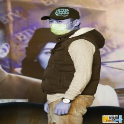

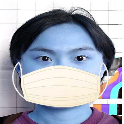

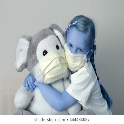

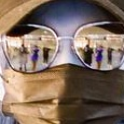

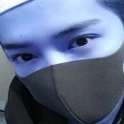

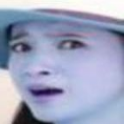

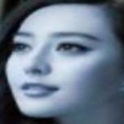

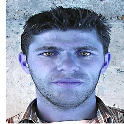

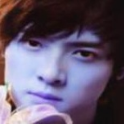

In [4]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

for images, labels in train_ds.take(1):
  for i in range(9):
    cv2_imshow(images[i].numpy().astype("uint8"))
   

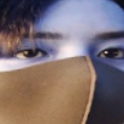

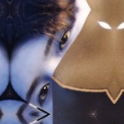

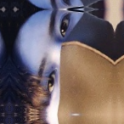

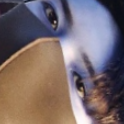

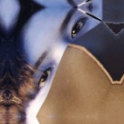

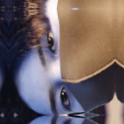

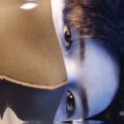

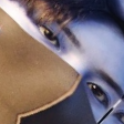

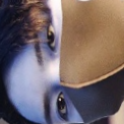

<Figure size 720x720 with 0 Axes>

In [4]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    cv2_imshow(augmented_images[0].numpy().astype("uint8"))
    

In [5]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 124, 124, 3)
(32, 1)


In [6]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
from tensorflow.keras import regularizers
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten,Dense
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Conv2D(32, 3, padding="same", activation="relu", input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(32, 3, padding="same", activation="relu"))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(64, 3, padding="same", activation="relu"))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(64, 3, padding="same", activation="relu"))
model.add(layers.MaxPool2D())


model.add(layers.Conv2D(128, 3, padding="same", activation="relu"))
model.add(layers.MaxPool2D())


model.add(layers.Conv2D(512, 3, padding="same", activation="relu",kernel_regularizer=regularizers.l1_l2(l1=0.0001,l2=0.001)))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.3))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 124, 124, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 64)      

In [12]:
from keras.callbacks import ReduceLROnPlateau

model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            # patience=2, 
                                            # verbose=1, 
                                            # factor=0.5, 
                                            # min_lr=0.0001)

# callbacks = [learning_rate_reduction]


In [13]:
epochs=11
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
 
)

Epoch 1/11
242/242 [==============================] - 18s 26ms/step - loss: 1.3153 - accuracy: 0.8909 - val_loss: 0.7519 - val_accuracy: 0.9458
Epoch 2/11
242/242 [==============================] - 2s 9ms/step - loss: 0.6394 - accuracy: 0.9547 - val_loss: 0.5370 - val_accuracy: 0.9641
Epoch 3/11
242/242 [==============================] - 2s 9ms/step - loss: 0.4706 - accuracy: 0.9647 - val_loss: 0.3847 - val_accuracy: 0.9771
Epoch 4/11
242/242 [==============================] - 2s 9ms/step - loss: 0.3654 - accuracy: 0.9721 - val_loss: 0.3487 - val_accuracy: 0.9623
Epoch 5/11
242/242 [==============================] - 2s 9ms/step - loss: 0.2967 - accuracy: 0.9721 - val_loss: 0.2760 - val_accuracy: 0.9714
Epoch 6/11
242/242 [==============================] - 2s 9ms/step - loss: 0.2379 - accuracy: 0.9775 - val_loss: 0.2319 - val_accuracy: 0.9741
Epoch 7/11
242/242 [==============================] - 2s 9ms/step - loss: 0.1954 - accuracy: 0.9813 - val_loss: 0.1794 - val_accuracy: 0.9810
Epoc

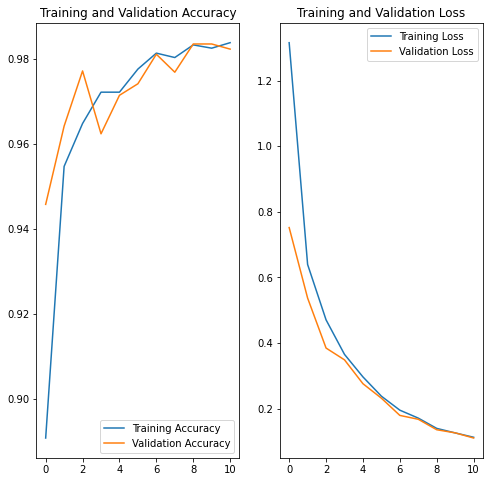

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [89]:
model.save("Final_model_Adam.h5")

Found 306 files belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


('              precision    recall  f1-score   support\n'
 '\n'
 '   with_mask       0.98      0.99      0.98      1655\n'
 'without_mask       0.99      0.98      0.98      1663\n'
 '\n'
 '    accuracy                           0.98      3318\n'
 '   macro avg       0.98      0.98      0.98      3318\n'
 'weighted avg       0.98      0.98      0.98      3318\n')


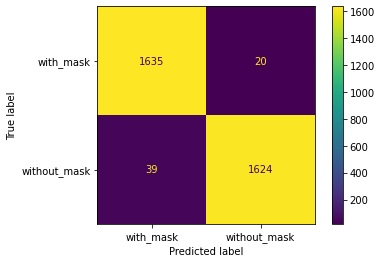

In [39]:
from sklearn import metrics
from pprint import pprint
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd


def evaluation(real_time_test_set_path,model_path):


  model = keras.models.load_model(model_path) #"/content/drive/MyDrive/Face_mask_classification/Output/Final_model_Adam.h5")

  pred = model.predict_generator(val_ds)
  y_pred = [1 * (x[0]>=0.5) for x in pred]

  test_label = np.concatenate([y for x, y in val_ds], axis=0) 
  confusion_matrix = metrics.confusion_matrix(y_true=test_label, y_pred=y_pred)

  class_labels = ['with_mask', 'without_mask']
  display_confusion_mat = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                          display_labels=class_labels)
  display_confusion_mat.plot()
  plt.savefig('Confusion_Matrix.png')

  report = metrics.classification_report(test_label, y_pred, target_names=class_labels)
  pprint(report)

real_time_test_set_path = '/content/drive/MyDrive/Face_mask_classification/real_testing_set'
model_path = "/content/drive/MyDrive/Face_mask_classification/Output/Final_model_Adam.h5"

evaluation(real_time_test_set_path,model_path)

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
#                           display_labels=class_labels)
# plt.savefig('Confusion_Matrix.png')

<function sklearn.metrics._classification.confusion_matrix>

In [55]:
!wget https://static.toiimg.com/thumb/msid-76119805,width-1070,height-580,imgsize-157913,resizemode-75,overlay-toi_sw,pt-32,y_pad-40/photo.jpg

--2022-01-15 20:13:14--  https://static.toiimg.com/thumb/msid-76119805,width-1070,height-580,imgsize-157913,resizemode-75,overlay-toi_sw,pt-32,y_pad-40/photo.jpg
Resolving static.toiimg.com (static.toiimg.com)... 23.216.249.167, 2a02:26f0:f4:386::216f, 2a02:26f0:f4:3ac::216f
Connecting to static.toiimg.com (static.toiimg.com)|23.216.249.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35906 (35K) [image/jpeg]
Saving to: ‘photo.jpg’

photo.jpg           100%[===================>]  35.06K  --.-KB/s    in 0.004s  

2022-01-15 20:13:14 (8.76 MB/s) - ‘photo.jpg’ saved [35906/35906]



In [16]:
# model = keras.models.load_model("/content/EPO_20-SGD_LR_0.0001-momentum_0.001-Batch_32_Updated_CNN.h5")

In [91]:
from tensorflow import keras
from google.colab.patches import cv2_imshow
# model = keras .models.load_model("/content/new_model.h5")
import cv2

img_path = "/content/5.jpg"

img_height = 124
img_width = 124
img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width),grayscale=False
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

print(img_array.shape)
# predictions = model.predict(img_array)

predictions = (model.predict(img_array) > 0.5).astype("int32")
print(predictions)


if predictions >= 0.5:
  print("Without mask")

elif predictions <= 0.5:
  print("With mask")
  

img = cv2.imread(img_path)
# cv2_imshow(img)



(1, 124, 124, 3)
[[0]]
With mask


In [92]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
img = cv2.resize(img,(img_height, img_width))
img  = img.astype(np.float32)
# img = img/255
img = tf.expand_dims(img, 0) # Create a batch
print(img.shape)
(model.predict(img) > 0.5).astype("int32")


(506, 918, 3)
(1, 124, 124, 3)


array([[0]], dtype=int32)

In [42]:
predictions

array([[1]], dtype=int32)

In [44]:
y= (model.predict(img_array))
y

array([[0.67307156]], dtype=float32)